# Análise Exploratória de Dados (EDA) - Diamonds

### Descrição da base de dados

A base de dados utilizada para desenvolver o projeto foi a *Diamonds*, disponibilizada pelo *Seaborn*. Ela contém dados de diversos diamantes, sua estrutura está representada na tabela a seguir:

| Colunas  | Descricao   | Tipo | Classificação |
| ------- | -------- | -------  | -------  |
| Carat  | Peso do diamante em gramas (quilates)  | Numérico| Quantitativa Contínua |
| Cut  | Qualidade do corte    | Categórico		| Qualitativas Ordinal|
| Color  | Cor do diamante    |	Categórico		| Qualitativas Nominal |
| Clarity  | Clareza/Pureza do diamante    |	Categórico		| Qualitativas Ordinal |
| Depth | Porcentagem total de profundidade, dado pela fórmula (z / mean(x, y)) = 2 * z / (x + y)    |	Numérico	| Quantitativa Contínua |
| Table | Tamanho em milímetros do ponto mais largo do diamante    |	Numérico	| Quantitativa Contínua |
| Price  | Preço do diamante em dólar  |	Numérico	| Quantitativa Contínua |
| X  | Comprimento em milímetros   |	Numérico	| Quantitativa Contínua |
| Y | Largura em milímetros    |	Numérico	| Quantitativa Contínua |
| Z | Profundidade em milímetros   |	Numérico	| Quantitativa Contínua |


Possuindo as informações iniciais sobre a base de dados:
 - Motivação: Relação entre preço e características dos diamantes.
 - Hipótese: O preço dos diamantes aumenta de acordo com suas características.

### Análises Iniciais

#### Importando as bibliotecas:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

C:\Users\artur\AppData\Local\Temp\ipykernel_3392\1842644581.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Importando a base de dados:

In [2]:
diamonds = sns.load_dataset('diamonds')


#### Informações sobre as colunas e dados:

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

##### Distribuição dos dados nos valores categóricos:

In [7]:
diamonds['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

Os tipos seguem essa ordem de "qualidade": (Fair (Pior), Good, Very Good, Premium, Ideal (Melhor))

In [8]:
diamonds['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

Os tipos seguem essa ordem de "qualidade": (J (Pior), I, H, G, F, E, D (Melhor))

In [9]:
diamonds['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

Os tipos seguem essa ordem de "qualidade": (I1 (Pior), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (Melhor))

##### Assimetria dos valores:

In [10]:
diamonds['carat'].skew()

1.116645920812613

In [11]:
diamonds['depth'].skew()

-0.08229402630189467

Se aproxima bastante de uma distribuição simétrica

In [12]:
diamonds['table'].skew()

0.7968958486695427

In [13]:
diamonds['price'].skew()

1.618395283383529

In [14]:
diamonds['x'].skew()

0.3786763426463927

In [15]:
diamonds['y'].skew()

2.4341667164885554

In [16]:
diamonds['z'].skew()

1.5224225590685583

As assimetrias tiveram a seguinte distribuição:

| Direita (valores acima da média) |
|------|
| Carat|
|Table|
|Price|
|X|
|Y|
|Z|

 Esquerda (valores abaixo da média)| 
|------|
| Depth|

### Visualização dos dados

##### Distribuição dos valores categóricos:

C:\Users\artur\AppData\Local\Temp\ipykernel_3392\75255374.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=diamonds, x=i,palette='crest' , ax=axes[idx]).set_title(i)
C:\Users\artur\AppData\Local\Temp\ipykernel_3392\75255374.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=diamonds, x=i,palette='crest' , ax=axes[idx]).set_title(i)
C:\Users\artur\AppData\Local\Temp\ipykernel_3392\75255374.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=diamonds, x=i,palette='crest' , ax=axes[idx]).set_title(i)


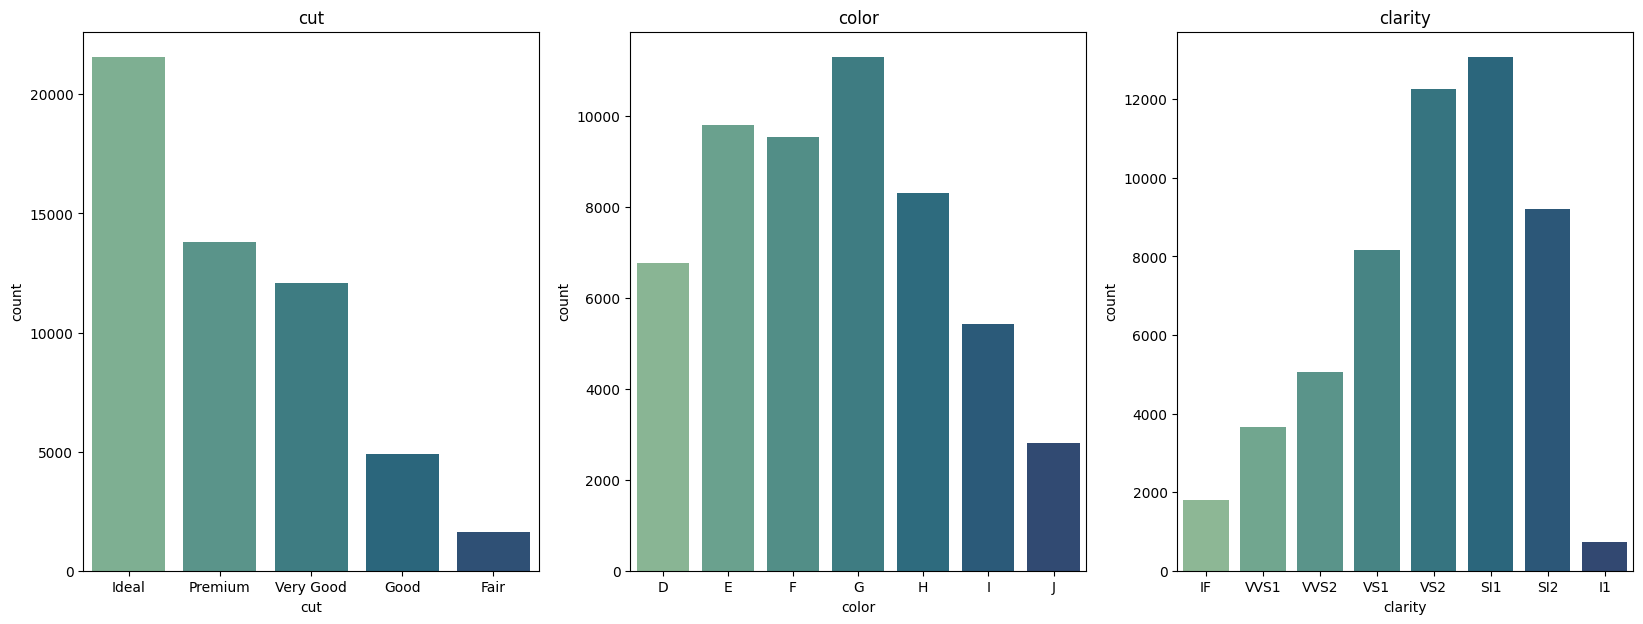

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
idx = 0
for i in ['cut', 'color', 'clarity']:
    sns.countplot(data=diamonds, x=i,palette='crest' , ax=axes[idx]).set_title(i)
    idx += 1
plt.show()

 - Algumas cores são mais comuns que outras, com distribuição aleatória.

 - Clareza tem distribuição normal, com alguma assimetria à esquerda.

#### BoxPlot:

##### Tamanho (X, Y, Z e Depth):

C:\Users\artur\AppData\Local\Temp\ipykernel_3392\4003547646.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx], orient='v').set_title(i)
C:\Users\artur\AppData\Local\Temp\ipykernel_3392\4003547646.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx], orient='v').set_title(i)
C:\Users\artur\AppData\Local\Temp\ipykernel_3392\4003547646.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx], orient='v').set_title(i)
C:\U

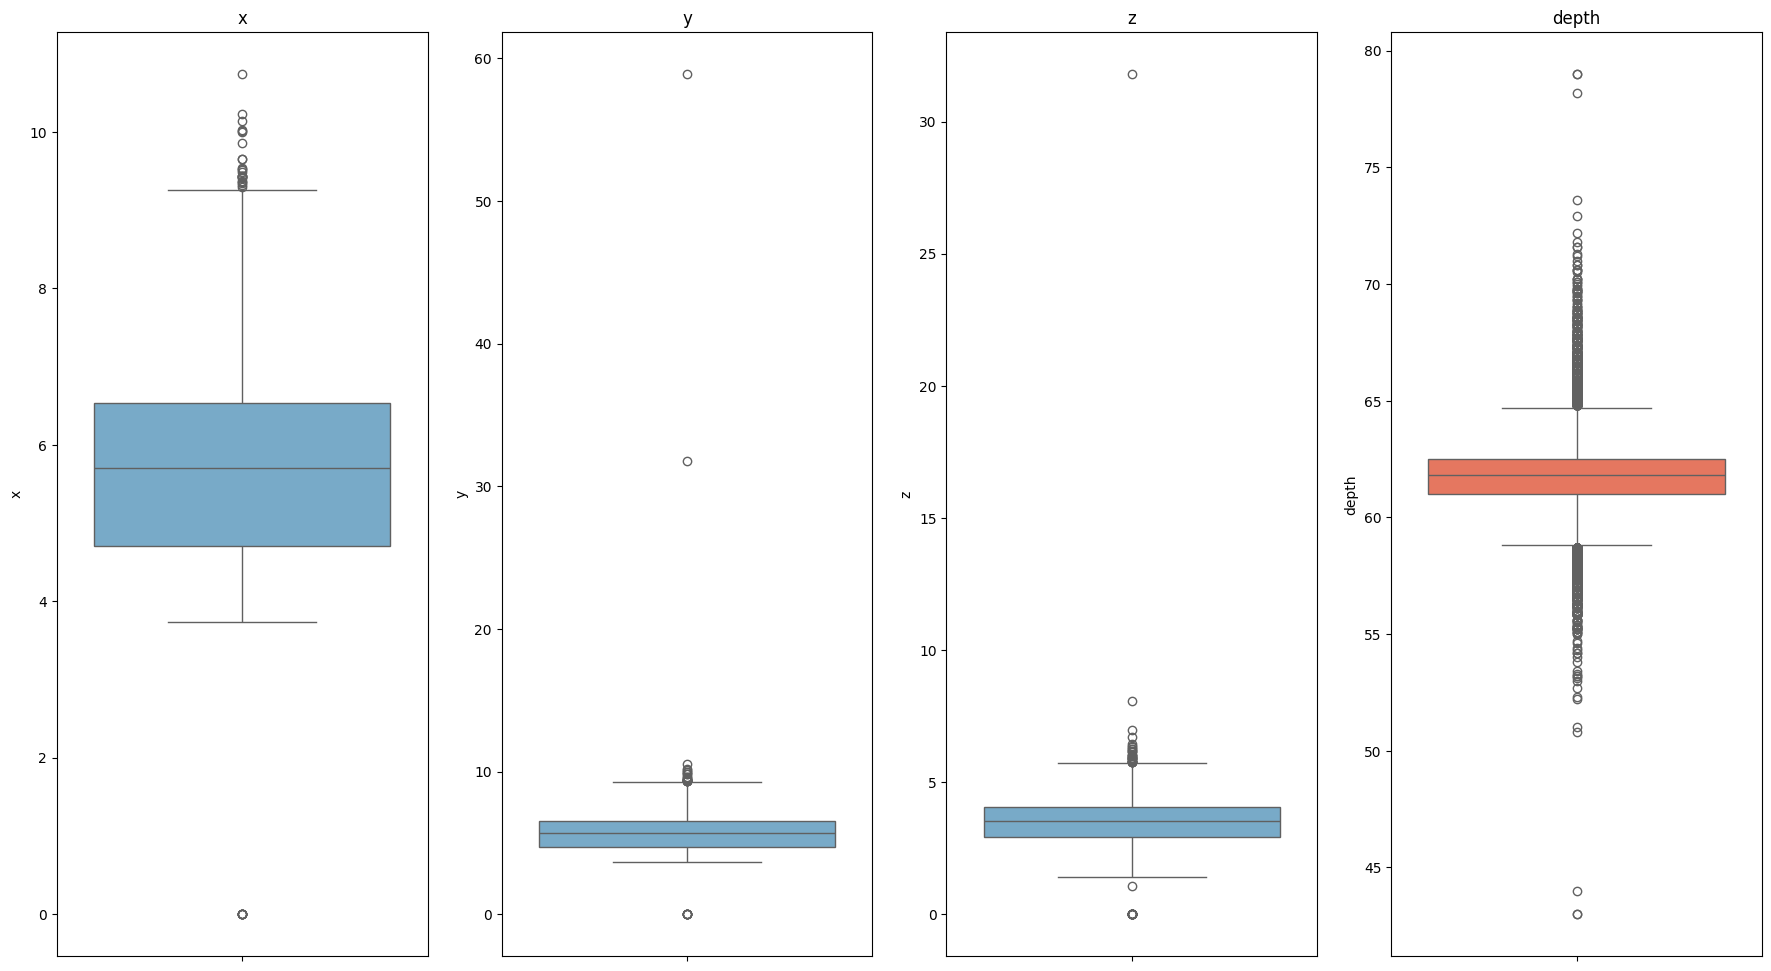

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22,12))
idx = 0
for i in ['x', 'y', 'z', 'depth']:
    palet = ('Blues' if i in 'xyz' else 'Reds')
    sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx], orient='v').set_title(i)
    idx += 1
plt.show()

Os valores de X, Y e Z apresentam uma grande variação quando comparado com a profundidade. A profundidade deveria ser calculada a partir da equação: 2z/(x+y). Por tanto, para remover os outliers, devemos: 
 - Remover os zeros.
 - Remover os que têm profundidade (com diferença maior que 1) da profundidade calculada com a fórmula.

In [19]:
diamonds['calc_depth'] = round(diamonds.z * 2 / (diamonds.x + diamonds.y) * 100,1)
diamonds.drop(diamonds[(diamonds.x == 0) | (diamonds.y == 0) |(diamonds.z == 0) |(diamonds.depth == 0)|(diamonds.y > 20) 
                       | (diamonds.z > 10)| (diamonds.z < 1.1)].index, inplace=True)
diamonds.drop(diamonds[np.abs(diamonds.depth - diamonds.calc_depth) > 1].index, inplace=True)
diamonds.drop(columns='calc_depth', axis=1, inplace=True)


Plotando o gráfico novamente:

C:\Users\artur\AppData\Local\Temp\ipykernel_3392\354495138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx]).set_title(i)
C:\Users\artur\AppData\Local\Temp\ipykernel_3392\354495138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx]).set_title(i)
C:\Users\artur\AppData\Local\Temp\ipykernel_3392\354495138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx]).set_title(i)
C:\Users\artur\AppData\Local\Temp\ipykernel

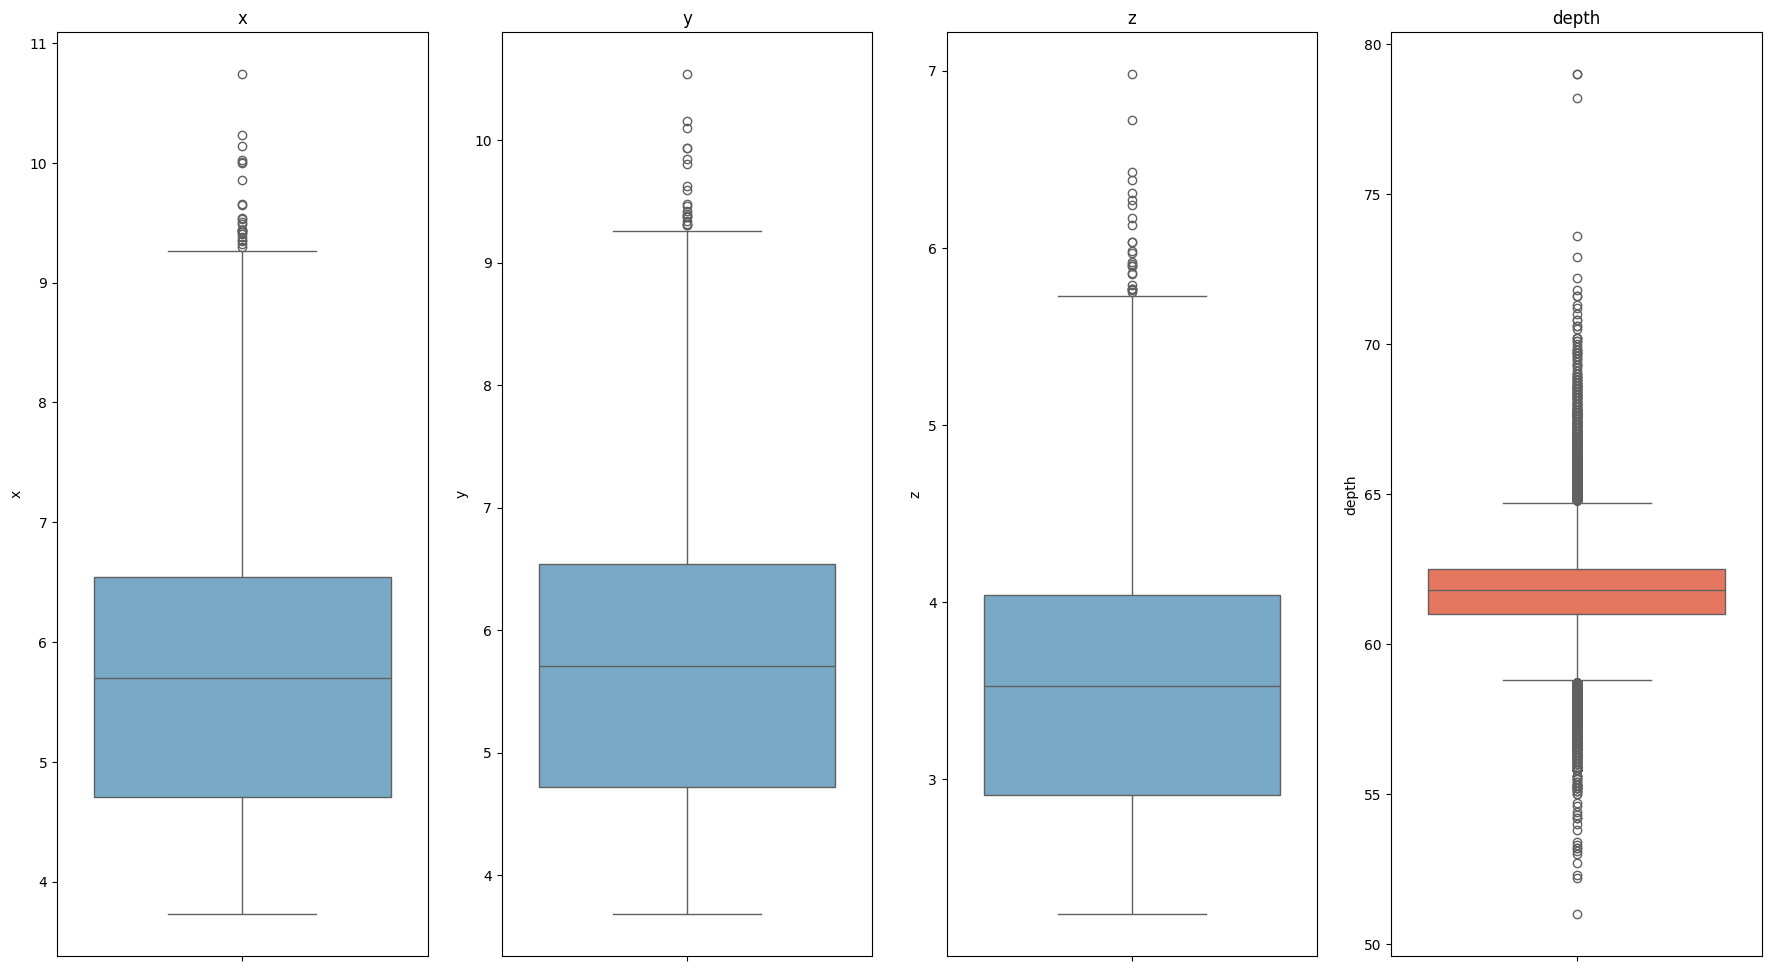

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22,12))
idx = 0
for i in ['x', 'y', 'z', 'depth']:
    palet = ('Blues' if i in 'xyz' else 'Reds')
    sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx]).set_title(i)
    idx += 1
plt.show()

Agora as medidas são mais compativeis com a profundidade.

##### Carat e Depth:

C:\Users\artur\AppData\Local\Temp\ipykernel_3392\3461867357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(diamonds['carat'],palette='viridis' ,ax=axes[0], orient='h')
C:\Users\artur\AppData\Local\Temp\ipykernel_3392\3461867357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(diamonds['table'],palette='viridis',ax=axes[1], orient='h')


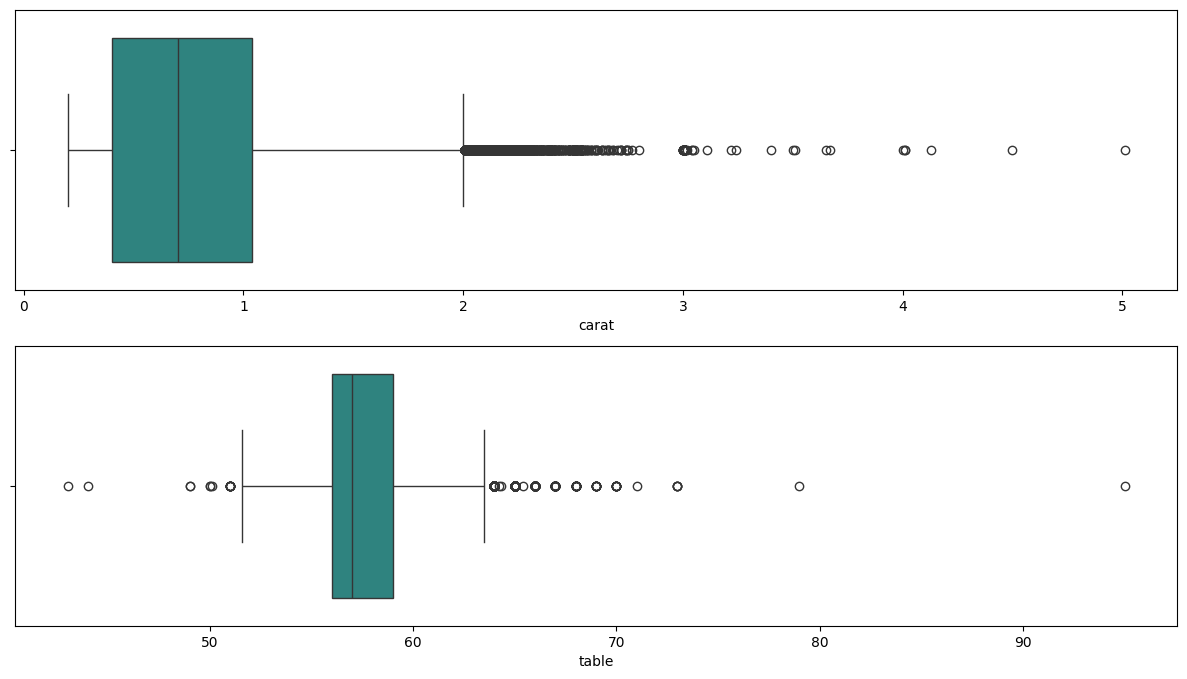

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8), sharex=False, sharey=False)
sns.boxplot(diamonds['carat'],palette='viridis' ,ax=axes[0], orient='h')
sns.boxplot(diamonds['table'],palette='viridis',ax=axes[1], orient='h')
plt.show()

In [22]:
carat_q1, carat_q3 = diamonds.carat.quantile(.25), diamonds.carat.quantile(.75)
table_q1, table_q3 = diamonds.table.quantile(.25) , diamonds.table.quantile(.75)

carat_upper = carat_q3 + (carat_q3 - carat_q1)*1.5
carat_lower = carat_q1 - (carat_q3 - carat_q1)*1.5

table_upper = table_q3 + (table_q3 - table_q1)*1.5
table_lower = table_q1 - (table_q3 - table_q1)*1.5

Para a identificação de outliers, foi-se utilizado o IQR (intervalo interquartil), que nos trouxe a seguinte quantidade de valores:

In [23]:
diamonds[(diamonds.carat>carat_upper)|(diamonds.carat<carat_lower)].count()[0]

C:\Users\artur\AppData\Local\Temp\ipykernel_3392\854790693.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diamonds[(diamonds.carat>carat_upper)|(diamonds.carat<carat_lower)].count()[0]


1880

In [24]:
diamonds[(diamonds.table>table_upper)|(diamonds.table<table_lower)].count()[0]

C:\Users\artur\AppData\Local\Temp\ipykernel_3392\1545641619.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diamonds[(diamonds.table>table_upper)|(diamonds.table<table_lower)].count()[0]


601

Mesmo sendo uma quantidade pequena de valores, iremos remove-los, para uma melhor análise.

In [25]:
diamonds.drop(diamonds[(diamonds.carat > carat_upper) | (diamonds.carat < carat_lower)].index, inplace=True)
diamonds.drop(diamonds[(diamonds.table > table_upper) | (diamonds.table < table_lower)].index, inplace=True)

Plotando o gráfico novamente:

C:\Users\artur\AppData\Local\Temp\ipykernel_3392\3461867357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(diamonds['carat'],palette='viridis' ,ax=axes[0], orient='h')
C:\Users\artur\AppData\Local\Temp\ipykernel_3392\3461867357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(diamonds['table'],palette='viridis',ax=axes[1], orient='h')


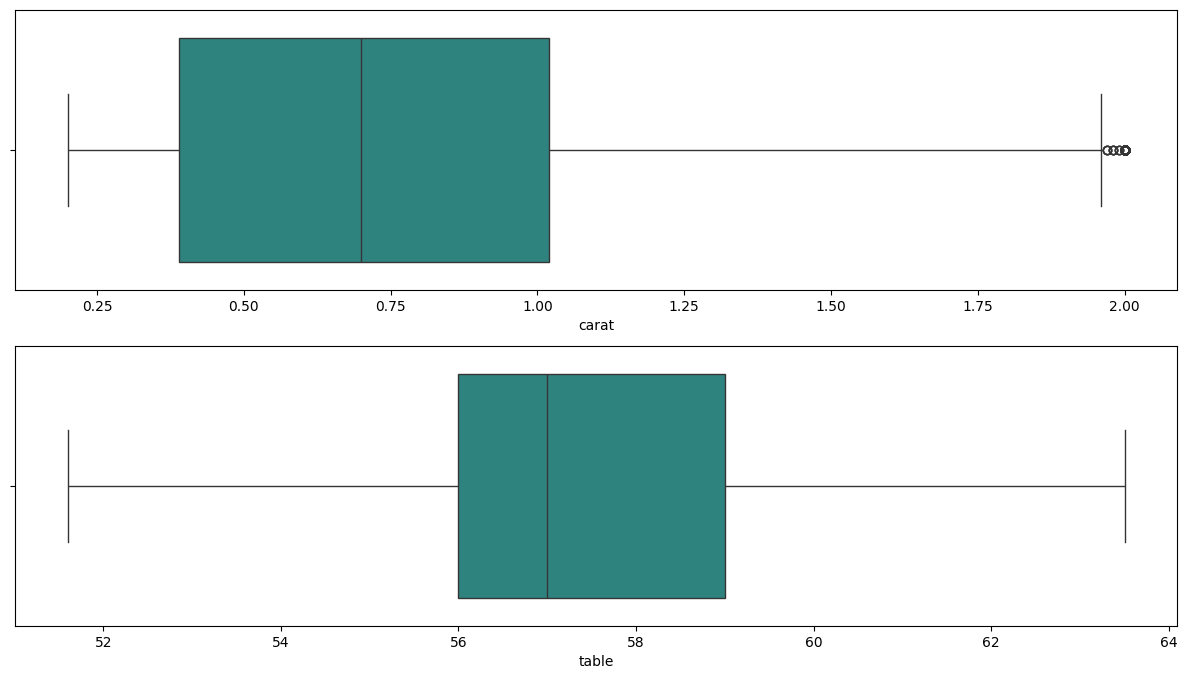

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8), sharex=False, sharey=False)
sns.boxplot(diamonds['carat'],palette='viridis' ,ax=axes[0], orient='h')
sns.boxplot(diamonds['table'],palette='viridis',ax=axes[1], orient='h')
plt.show()

##### Price:

C:\Users\artur\AppData\Local\Temp\ipykernel_3392\3930677287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(diamonds['price'],palette='rocket_r', orient='h')


<Axes: xlabel='price'>

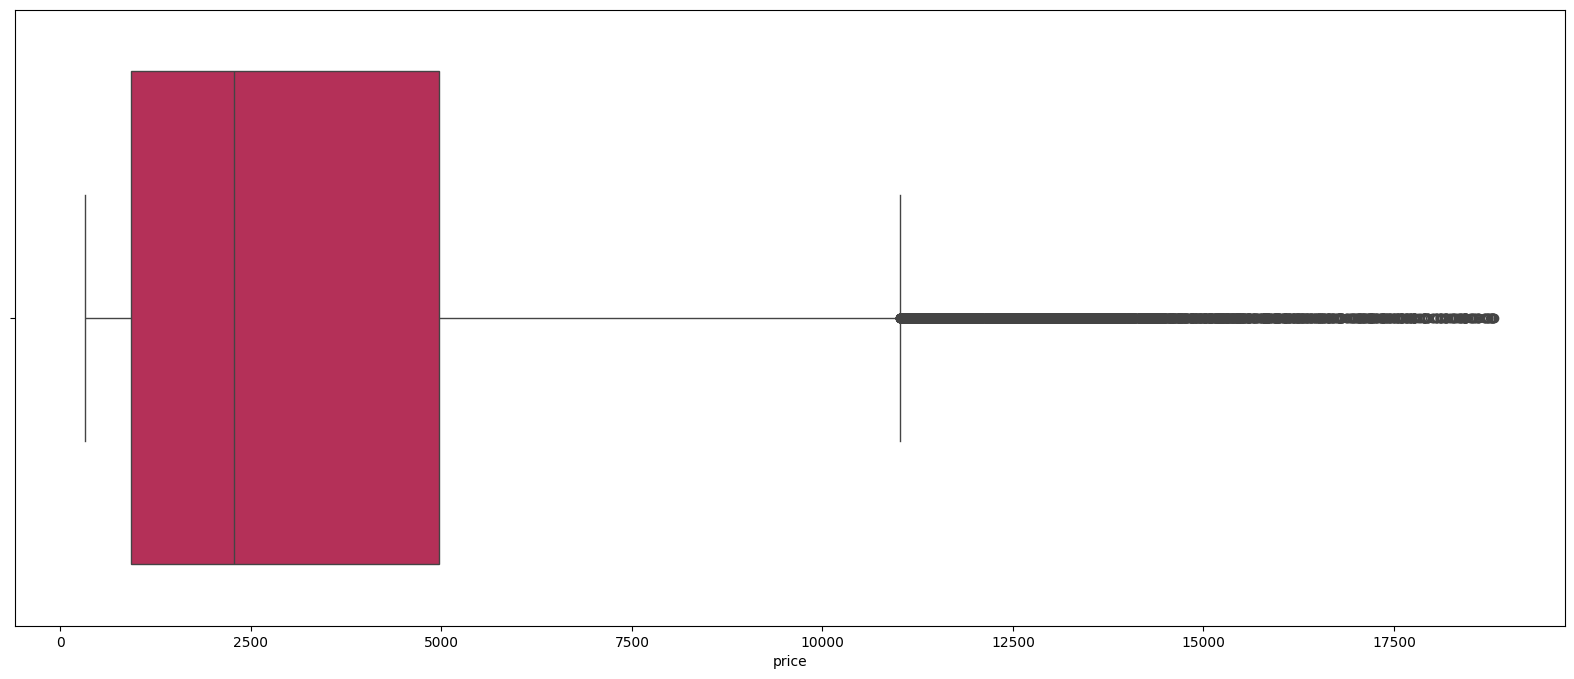

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8), sharex=False, sharey=False)
sns.boxplot(diamonds['price'],palette='rocket_r', orient='h')

In [28]:
price_q1, price_q3 = diamonds.price.quantile(.25) , diamonds.price.quantile(.75)
price_upper = price_q3 + (price_q3 - price_q1)*1.5
price_upper

11018.0

Para a identificação de outliers, foi-se utilizado o IQR (intervalo interquartil), que nos trouxe a seguinte quantidade de valores:

In [29]:
diamonds[diamonds.price > price_upper]

,carat,cut,color,clarity,depth,table,price,x,y,z
22968,1.07,Very Good,F,IF,59.4,59.0,11019,6.64,6.70,3.96
22969,1.63,Ideal,I,VS2,61.9,54.3,11019,7.54,7.58,4.68
22970,1.21,Ideal,D,VS1,60.1,60.0,11019,6.92,6.99,4.18
22971,1.74,Premium,I,SI1,58.7,60.0,11020,7.90,7.84,4.62
22972,1.20,Premium,F,VVS2,62.2,58.0,11021,6.83,6.78,4.23
...,...,...,...,...,...,...,...,...,...,...
27740,1.71,Premium,F,VS2,62.3,59.0,18791,7.57,7.53,4.70
27743,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56


In [30]:
diamonds.drop(diamonds[diamonds.price > price_upper].index, inplace= True)

Plotando o gráfico novamente:

C:\Users\artur\AppData\Local\Temp\ipykernel_3392\3930677287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(diamonds['price'],palette='rocket_r', orient='h')


<Axes: xlabel='price'>

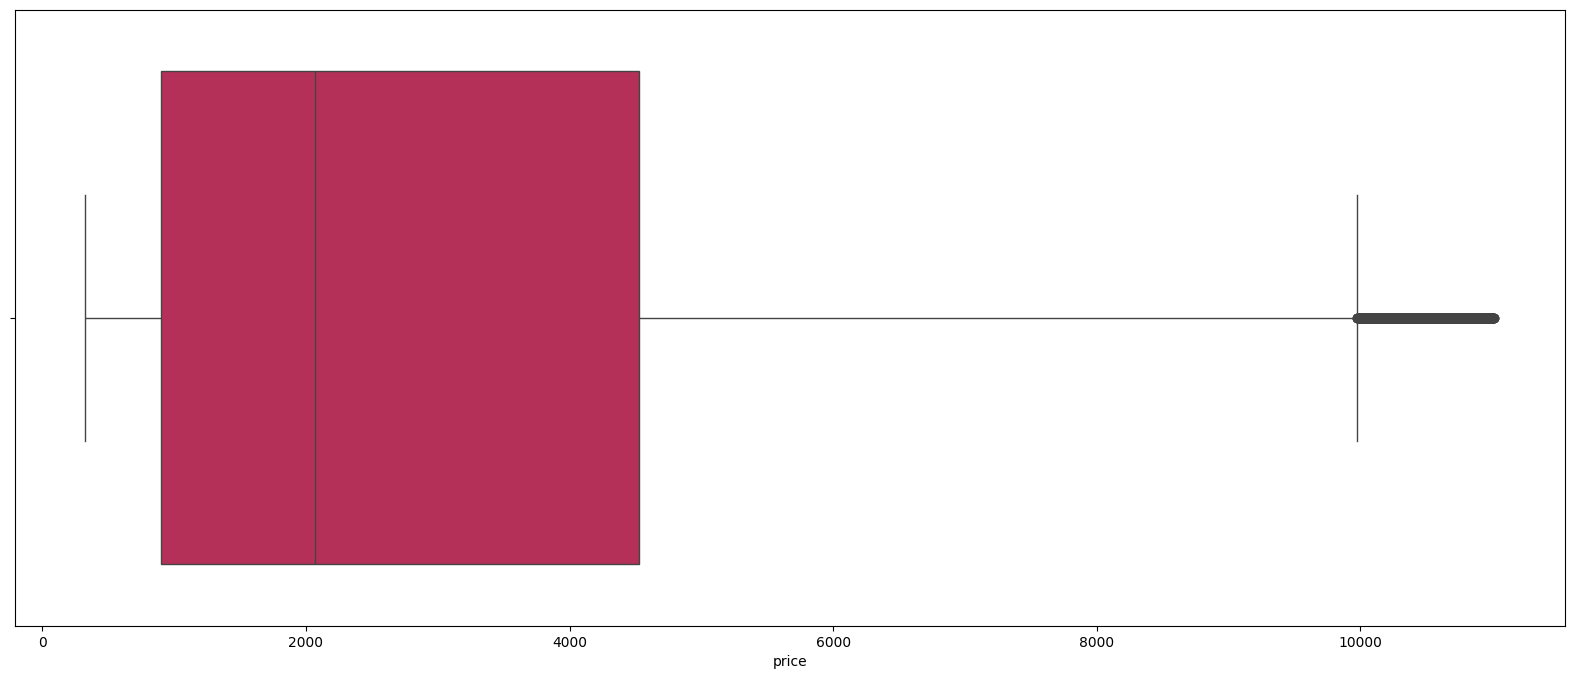

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8), sharex=False, sharey=False)
sns.boxplot(diamonds['price'],palette='rocket_r', orient='h')

##### Preço para corte, cor e pureza:

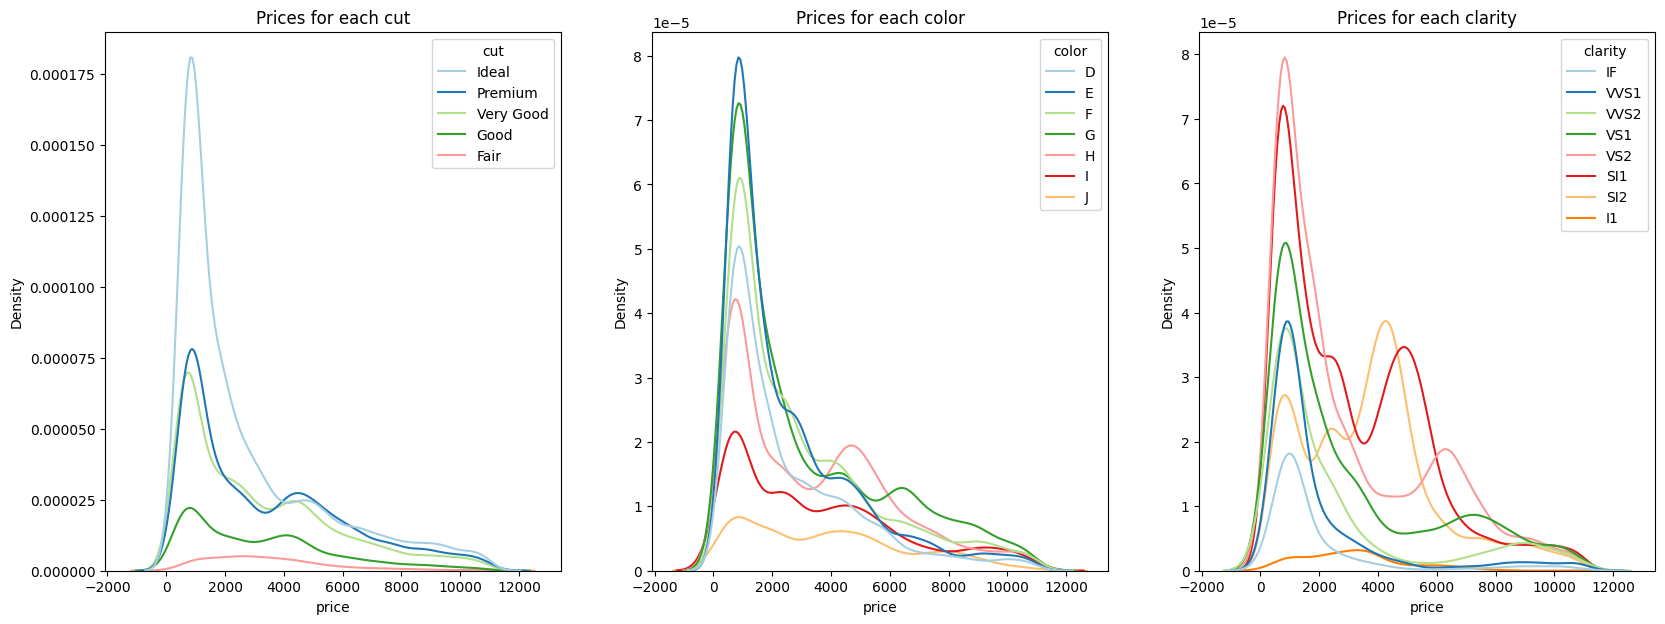

In [32]:
cat_col = ['cut', 'color', 'clarity']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7), sharex=True)
for i in range(len(cat_col)):
    sns.kdeplot(data=diamonds, x='price', hue=cat_col[i], palette='Paired', ax=axes[i]).set_title(f'Prices for each {cat_col[i]}')
plt.show()


#### Correlação entre preço e caracteristicas:

Primeiramente, para poder trabalhar com todas as caracteristicas será necessário transformar as colunas categóricas em númericos, correspondentes a sua ordem de qualidade.

In [33]:
dict_cut = dict((k,v) for v, k in enumerate(('Fair', 'Good', 'Very Good', 'Premium', 'Ideal')))
dict_color = dict((k,v) for v, k in enumerate('DEFGHIJ'[::-1]))
dict_clarity = dict((k,v) for v, k in enumerate(('I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF')))

In [34]:
diamonds.replace({'cut': dict_cut}, inplace=True)
diamonds.replace({'color': dict_color}, inplace=True)
diamonds.replace({'clarity': dict_clarity}, inplace=True)
diamonds[['cut','color','clarity']] = diamonds[['cut','color','clarity']].astype('category')
diamonds.head()

C:\Users\artur\AppData\Local\Temp\ipykernel_3392\2944568427.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diamonds.replace({'cut': dict_cut}, inplace=True)
C:\Users\artur\AppData\Local\Temp\ipykernel_3392\2944568427.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  diamonds.replace({'cut': dict_cut}, inplace=True)
C:\Users\artur\AppData\Local\Temp\ipykernel_3392\2944568427.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_o

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48


Assim, podemos plotar o gráfico:

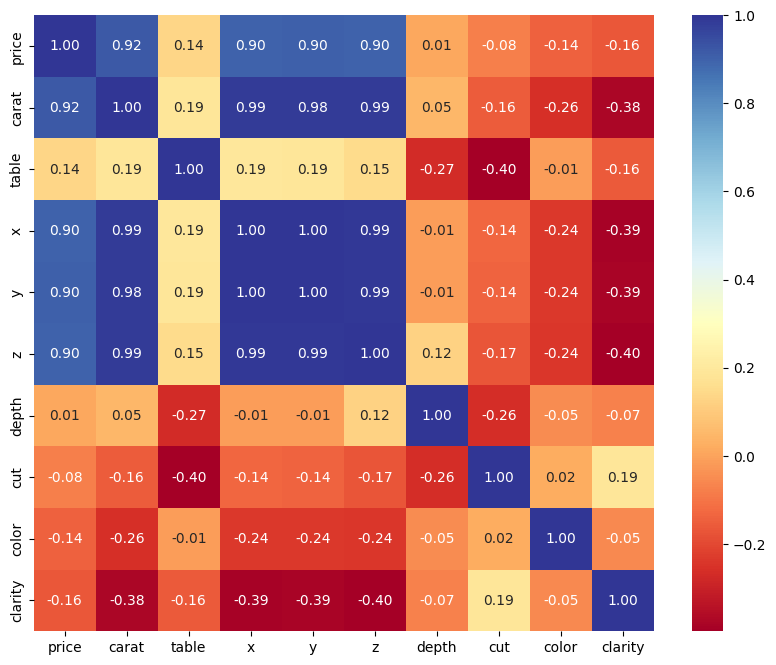

In [35]:
num_col = ['carat', 'table', 'x','y','z', 'depth']
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,8))
sns.heatmap(pd.concat([diamonds['price'], diamonds[num_col], diamonds[cat_col].astype('int')], axis=1).corr(), cmap="RdYlBu", annot=True, fmt=".02f")
plt.show()

Como podemos ver no Heatmap, o preço apresenta alta correlação com os valores de X, Y, Z e o Carat. Já as outras caracteristicas como depth, cut, color e clarity não influenciam muito no valor do diamante.

### Teste de Hipótese:

##### Color:

In [36]:
prices_D = diamonds[diamonds['color'] == 6]['price']
prices_E = diamonds[diamonds['color'] == 5]['price']

normal_test_D = stats.normaltest(prices_D)
pvalue_D = normal_test_D.pvalue

normal_test_E = stats.normaltest(prices_E)
pvalue_E = normal_test_E.pvalue

if pvalue_D <= 0.05:
    print("Os preços dos diamantes com cor 'D' não seguem uma distribuição normal.")
else:
    print("Os preços dos diamantes com cor 'D' seguem uma distribuição normal.")
if pvalue_E <= 0.05:
    print("Os preços dos diamantes com cor 'E' não seguem uma distribuição normal.")
else:
    print("Os preços dos diamantes com cor 'E' seguem uma distribuição normal.")


if pvalue_D > 0.05 and pvalue_E > 0.05:
    t_test = stats.ttest_ind(prices_D, prices_E)
    pvalue_t = t_test.pvalue
    if pvalue_t <= 0.05:
        print('Rejeitamos H0, ou seja, não há diferença significativa nos preços entre os diamantes com cor E e D.')
    else:
        print('Aceitamos H0, há diferença significativa nos preços entre os diamantes com cor E e D.')
else:
    u_test = stats.mannwhitneyu(prices_D, prices_E)
    pvalue_u = u_test.pvalue
    print(pvalue_u)
    if pvalue_u <= 0.05:
        print('Rejeitamos H0, ou seja, não há diferença significativa nos preços entre os diamantes com cor E e D.')
    else:
        print('Aceitamos H0, há diferença significativa nos preços entre os diamantes com cor E e D.')

Os preços dos diamantes com cor 'D' não seguem uma distribuição normal.
Os preços dos diamantes com cor 'E' não seguem uma distribuição normal.
0.007545113298248918
Rejeitamos H0, ou seja, não há diferença significativa nos preços entre os diamantes com cor E e D.


### Conclusões

Ao fim do projeto, podemos concluir que o diamante tem sua precificação altemente correlacionada com o seu tamanho e peso, as principais caracteristicas para definir seu valor. Mas, tendo uma mudança pequena quando se altera cor, corte, pureza, table ou depth.